## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


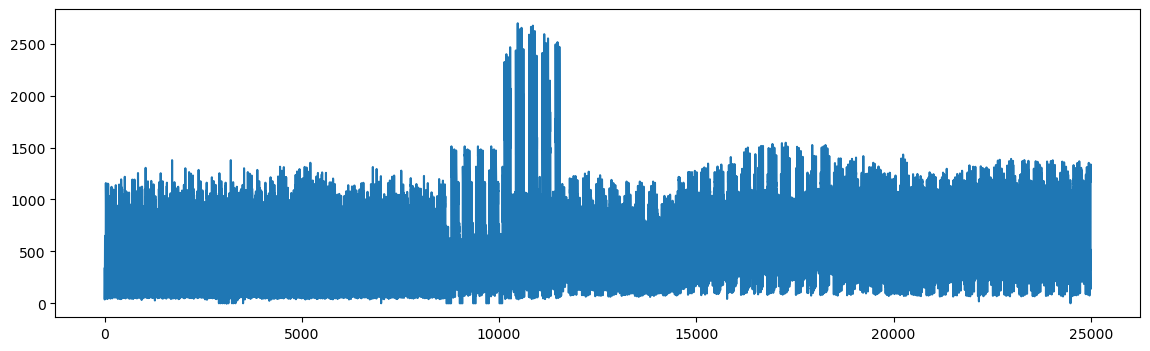

In [3]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


In [4]:
import torch
def add_nan(x, percent = 0.25):
    x_nan = x.copy()
    total_elements = x.size
    num_nan = int(total_elements * percent)
    flat_indices = np.random.choice(total_elements, num_nan, replace=False)
    multidim_indices = np.unravel_index(flat_indices, x.shape)
    x_nan[multidim_indices] = np.nan
    
    return x_nan, multidim_indices

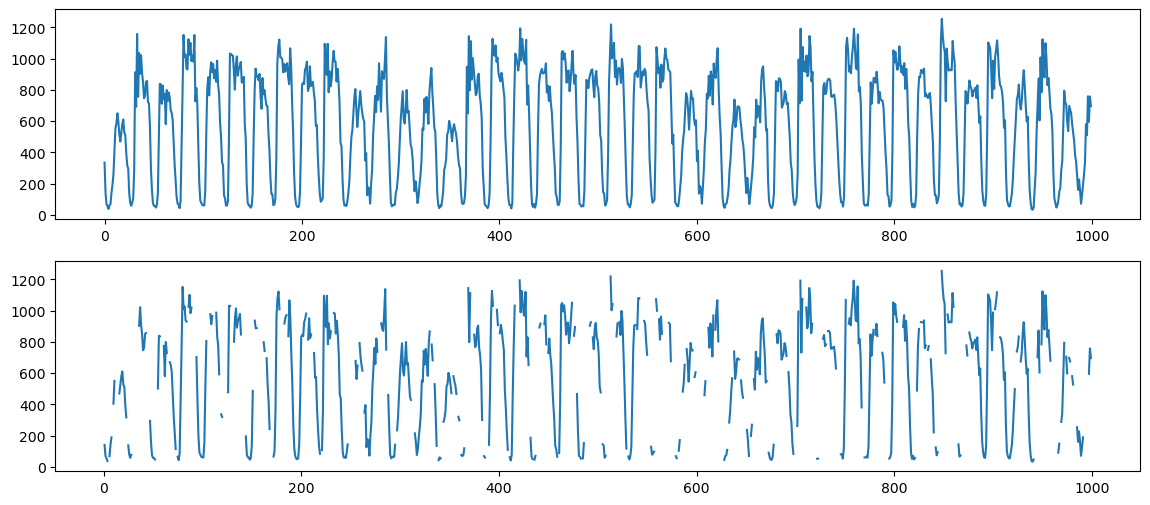

In [5]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [6]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [7]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

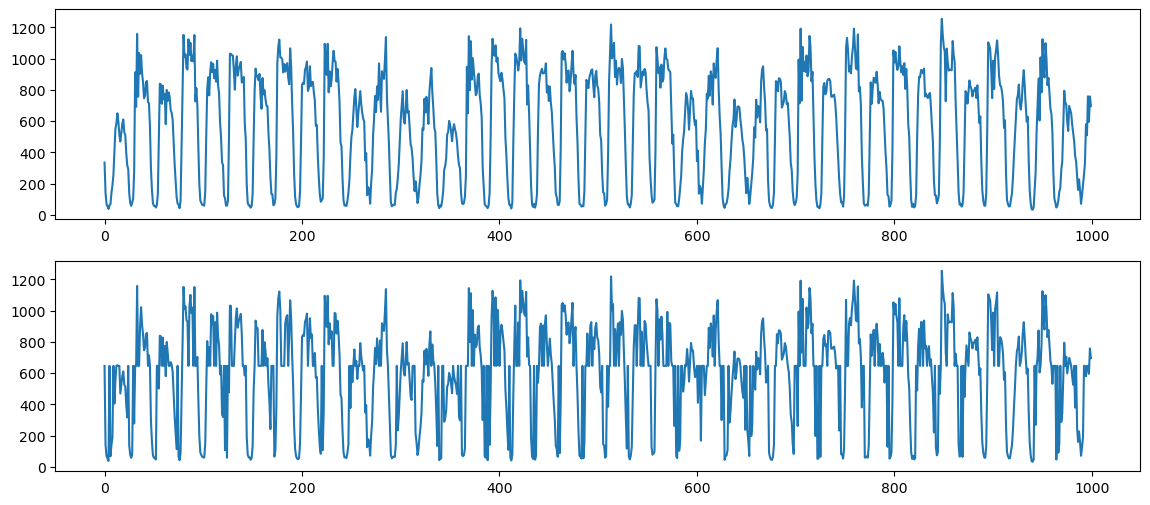

MAE=83.98407745239238, MSE=39228.94583133301, RMSE=198.06298450577032, R²=0.7489100814753078


In [110]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()
mae, mse, rmse, r2 = compute_metrics(madrid, madrid_median.flatten()[:len(madrid)])
results['nanmean'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
result=results['nanmean']
print(f"MAE={result['MAE']}, MSE={result['MSE']}, RMSE={result['RMSE']}, R²={result['R²']}")

In [9]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [10]:
recovery['median'] = madrid_median
results={}

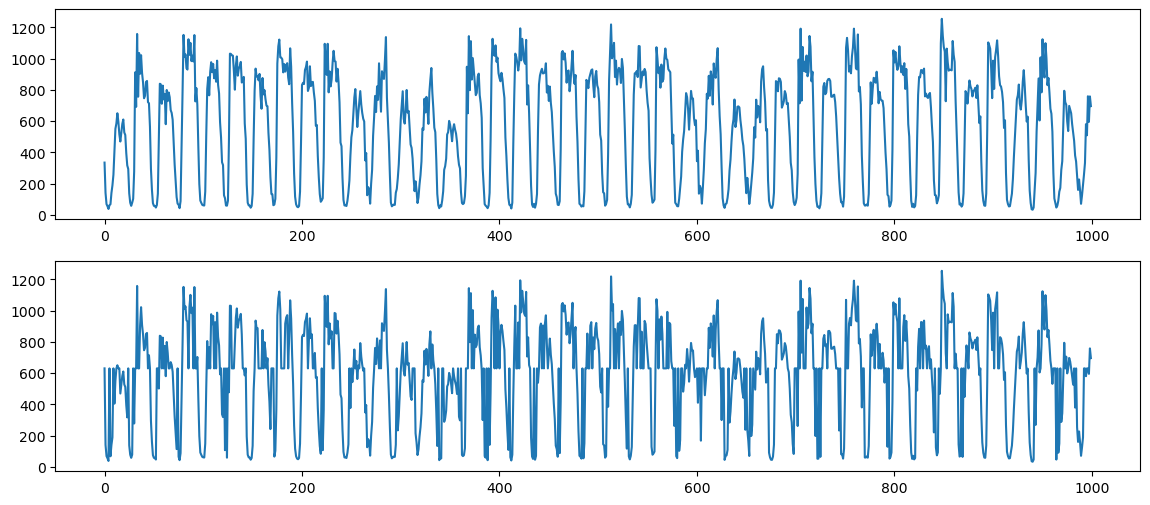

MAE=83.98407745239238, MSE=39228.94583133301, RMSE=198.06298450577032, R²=0.7489100814753078


In [111]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()
min_length = min(len(madrid), len(madrid_median.flatten()))
madrid = madrid[:min_length]
madrid_median = madrid_median.flatten()[:min_length]
mae, mse, rmse, r2 = compute_metrics(madrid, madrid_median.flatten()[:len(madrid)])
results['median'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
result=results['median']
print(f"MAE={result['MAE']}, MSE={result['MSE']}, RMSE={result['RMSE']}, R²={result['R²']}")

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [12]:
from sklearn.impute import KNNImputer

In [89]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    stride_data = np.lib.stride_tricks.sliding_window_view(a, window_shape=window)
    return stride_data
madrid_slice = rolling_window(madrid_with_nan, 5)


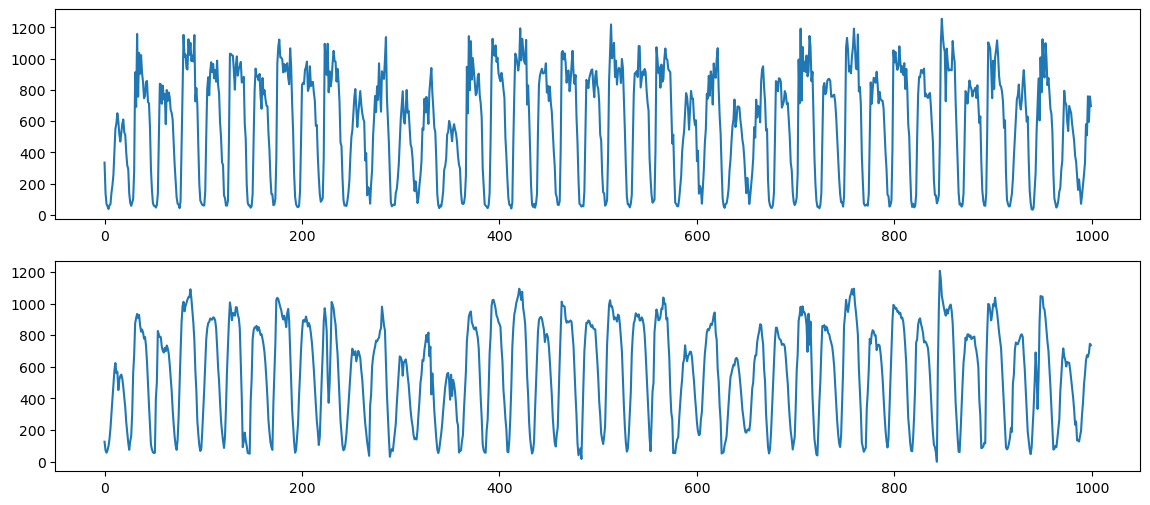

MAE=83.4875070767177, MSE=38585.933964328055, RMSE=196.43302666386845, R²=0.7530257617179242


In [118]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

data_imputed_knn = imputer.fit_transform(madrid_with_nan.reshape(-1, 1))
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(data_imputed[:1000])
plt.show()
min_length = min(len(madrid), len(data_imputed_knn.flatten()))
madrid = madrid[:min_length]
data_imputed_knn = data_imputed_knn.flatten()[:min_length]
mae, mse, rmse, r2 = compute_metrics(madrid, data_imputed_knn.flatten()[:len(madrid)])
results['knn'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
result=results['knn']
print(f"MAE={result['MAE']}, MSE={result['MSE']}, RMSE={result['RMSE']}, R²={result['R²']}")

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [ ]:
!pip install fancyimpute

In [18]:
from fancyimpute import IterativeSVD

In [19]:
from sklearn.metrics import mean_squared_error

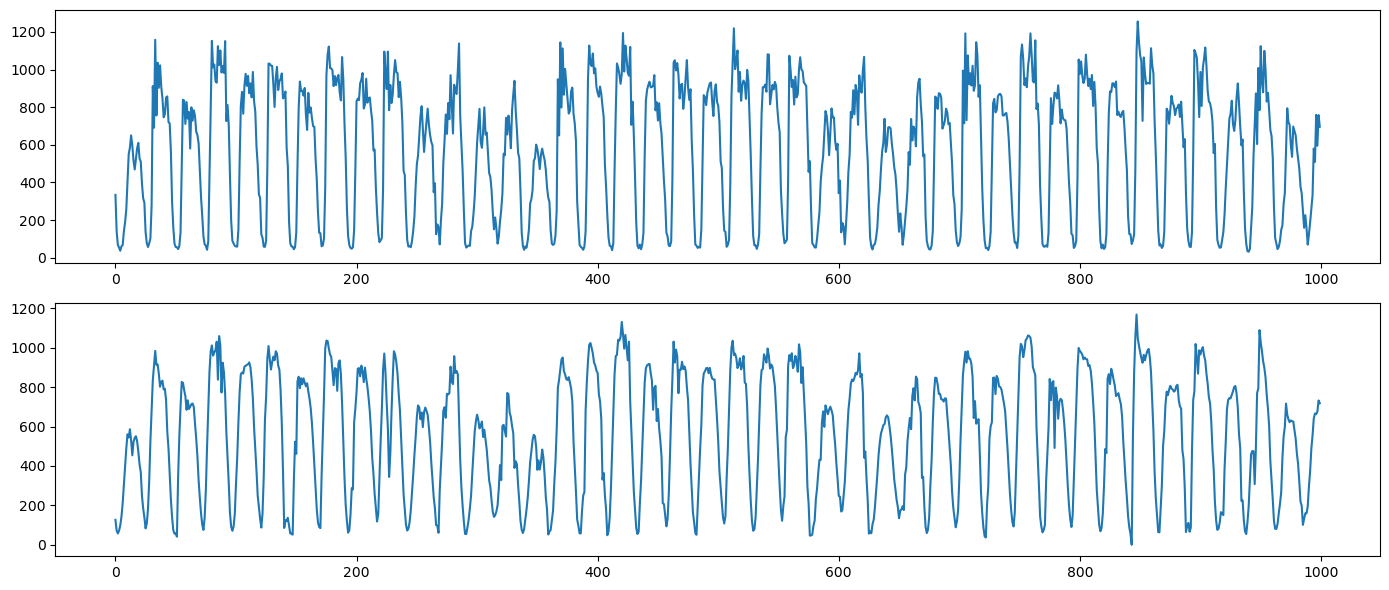

MAE=168.26348399392398, MSE=58546.73460888283, RMSE=241.9643250747573, R²=0.6252640872370943


In [122]:
imputer = IterativeSVD(rank=3, verbose=False)

data_imputed = imputer.fit_transform(madrid_slice)
data_imputed = data_imputed.mean(axis=1)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(data_imputed[:1000])
plt.tight_layout()
plt.show()
def compute_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

# Оценка качества восстановления для каждого метода
min_length = min(len(madrid), len(data_imputed.flatten()))
madrid = madrid[:min_length]
data_imputed = data_imputed.flatten()[:min_length]
mae, mse, rmse, r2 = compute_metrics(madrid, data_imputed.flatten()[:len(madrid)])
results['svd'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

result=results['svd']
print(f"MAE={result['MAE']}, MSE={result['MSE']}, RMSE={result['RMSE']}, R²={result['R²']}")

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



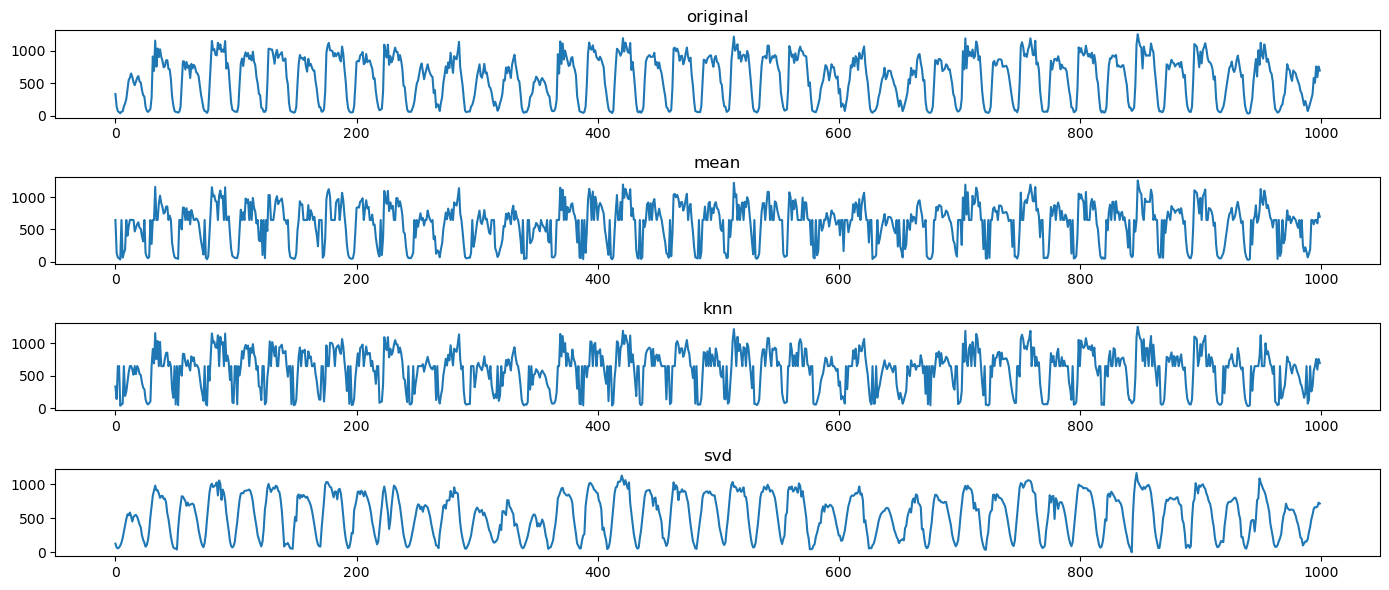

In [123]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=4)
ax[0].plot(madrid[:1000])
ax[0].title.set_text('original')
ax[1].plot(madrid_mean[:1000])
ax[1].title.set_text('mean')
ax[2].plot(data_imputed_knn[:1000])
ax[2].title.set_text('knn')
ax[3].plot(data_imputed[:1000])
ax[3].title.set_text('svd')
plt.tight_layout()
plt.show()

 Вывод: метод KNN и mean имеют наилучшие метрики, однако они не позволяют получить правдоподобный временной ряд. Метод SVD позволяет получить временной ряд, очень похожий на исходный, при этом этот ряд не будет зашумлен, как ряды, полученные предыдущими методах.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [143]:
recovery_nn = {}
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
def add_nan(x, percent=0.25):
    x_nan = x.clone()
    total_elements = x.numel()
    num_nan = int(total_elements * percent)
    flat_indices = torch.randperm(total_elements)[:num_nan]
    
    # Создаём булеву маску
    nan_mask = torch.zeros_like(x_nan, dtype=torch.bool).flatten()
    nan_mask[flat_indices] = True
    nan_mask = nan_mask.view_as(x_nan)  # Приведение маски к форме x_nan
    
    # Устанавливаем NaN по маске
    x_nan[nan_mask] = float('nan')
    
    return x_nan, nan_mask


##### 7.2.1 Загрузка и подготовка данных

In [130]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [131]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [132]:
madrid_with_nan.shape

(25000, 10)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [134]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [135]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [136]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 100

(16683, 100, 10) (8217, 100, 10)


In [137]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [138]:
import time
times_model = {}

In [144]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            X[torch.isnan(X)]=0.0
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)]=0.0
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

C:\Users\User\AppData\Local\Temp\ipykernel_20064\1889781897.py:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
D:\Anaconda\Lib\site-packages\torch\autograd\graph.py:825: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


valid


C:\Users\User\AppData\Local\Temp\ipykernel_20064\1889781897.py:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.01638477446575617, valid:0.008556209706751874
valid
epoch:2 train:0.008612524584235474, valid:0.00766385898586045
valid
epoch:3 train:0.006631087815082165, valid:0.005564719532407069
valid
epoch:4 train:0.005359924583913494, valid:0.004946539052148429
valid
epoch:5 train:0.004745238335710376, valid:0.004637653322154006
valid
epoch:6 train:0.0043072477464788945, valid:0.004243752224255324
valid
epoch:7 train:0.0039274057666003935, valid:0.004064291569425962
valid
epoch:8 train:0.0036758097866371672, valid:0.0038332977826714284
valid
epoch:9 train:0.0034438306777969975, valid:0.0037213231223931376
valid
epoch:10 train:0.0032651160747326656, valid:0.0035564845370114314
valid
epoch:11 train:0.0030979099005489287, valid:0.003395681401223753
valid
epoch:12 train:0.0029800244601678916, valid:0.0033767031354093274
valid
epoch:13 train:0.002864978224452999, valid:0.0032250049502350565
valid
epoch:14 train:0.002770209778635495, valid:0.0031895385423400834
valid
epoch:15 train:0.0

In [145]:
times_model['linear']=end-start

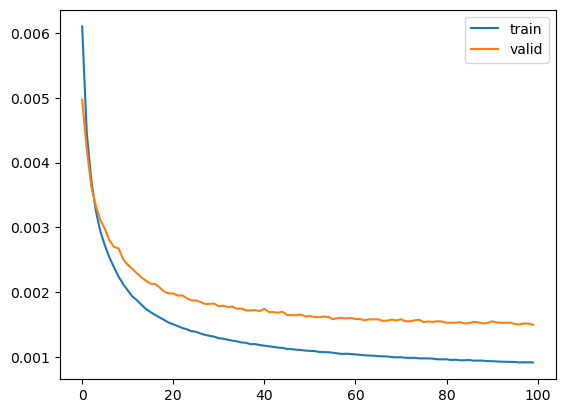

10.0 m


In [194]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()
print(times_model['linear']//60, 'm')


In [147]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [148]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [149]:
recovery_nn['linear'] = test_linear

20076.227832928187


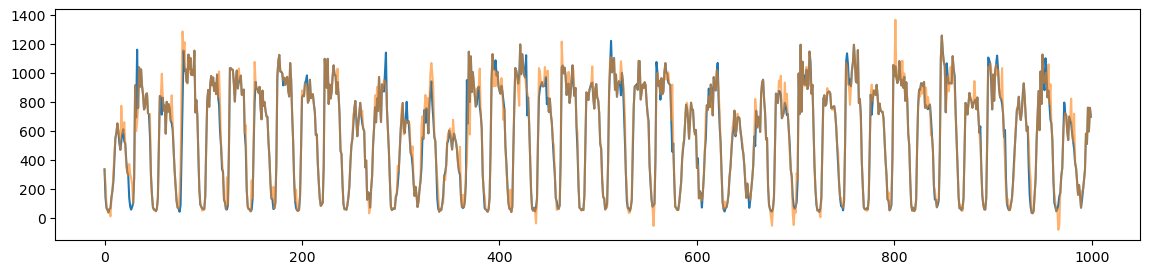

In [150]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [157]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [158]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [159]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [186]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [187]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [163]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            X[torch.isnan(X)]=0.0
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)]=0.0
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

C:\Users\User\AppData\Local\Temp\ipykernel_20064\1147666075.py:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
C:\Users\User\AppData\Local\Temp\ipykernel_20064\1147666075.py:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.006098982551531203, valid:0.004969976661914541
epoch:2 train:0.004474663722482278, valid:0.004211667676044758
epoch:3 train:0.003732203869898429, valid:0.003636585082858801
epoch:4 train:0.0032578229153050657, valid:0.0033348261797439683
epoch:5 train:0.002934006363032136, valid:0.0031108810555536387
epoch:6 train:0.0027201714634652683, valid:0.0029750426043575816
epoch:7 train:0.0025329945173642645, valid:0.002797172034823502
epoch:8 train:0.002383105977798787, valid:0.002699509483235058
epoch:9 train:0.002239448547370418, valid:0.0026751248898749897
epoch:10 train:0.002126818828791437, valid:0.002508040905619661
epoch:11 train:0.002029985968216226, valid:0.002423411090822183
epoch:12 train:0.0019365248098163028, valid:0.0023602585907476817
epoch:13 train:0.001877171559691058, valid:0.00229255938469324
epoch:14 train:0.0018079641522211647, valid:0.0022282324868521486
epoch:15 train:0.0017416204033255348, valid:0.002177933111873477
epoch:16 train:0.0016927814384979478, 

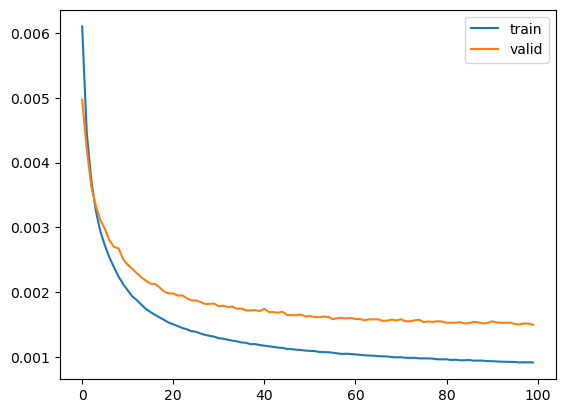

In [164]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()


In [196]:
times_model['ae']=end-start

In [197]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [198]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [199]:
recovery_nn['test_ae'] = test_ae

312319.03406152694
271.0 m


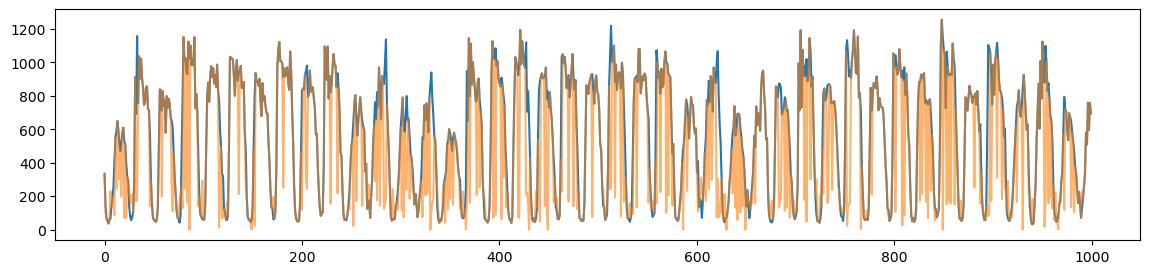

In [200]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))
print(times_model['ae']//60, 'm')


##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [170]:
from pypots.imputation import SAITS


In [171]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

Model initialized successfully. Number of the trainable parameters: 667608


In [172]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1408, validating loss 0.0489
epoch 1: training loss 0.0799, validating loss 0.0395
epoch 2: training loss 0.0678, validating loss 0.0365
epoch 3: training loss 0.0617, validating loss 0.0332
epoch 4: training loss 0.0541, validating loss 0.0313
epoch 5: training loss 0.0495, validating loss 0.0295
epoch 6: training loss 0.0469, validating loss 0.0289
epoch 7: training loss 0.0428, validating loss 0.0283
epoch 8: training loss 0.0409, validating loss 0.0282
epoch 9: training loss 0.0396, validating loss 0.0273
epoch 10: training loss 0.0386, validating loss 0.0258
epoch 11: training loss 0.0380, validating loss 0.0266
epoch 12: training loss 0.0372, validating loss 0.0266
epoch 13: training loss 0.0366, validating loss 0.0257
epoch 14: training loss 0.0360, validating loss 0.0260
epoch 15: training loss 0.0356, validating loss 0.0255
epoch 16: training loss 0.0351, validating loss 0.0258
epoch 17: training loss 0.0347, validating loss 0.0260
epoch 18: training l

In [173]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [174]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [175]:
recovery_nn['saits'] = test_saits

5329.858112282527
271.0 m


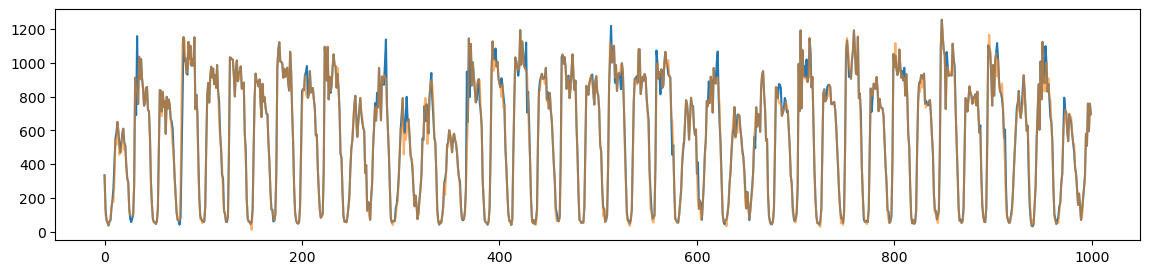

In [193]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))
print(times_model['saits']//60, 'm')

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

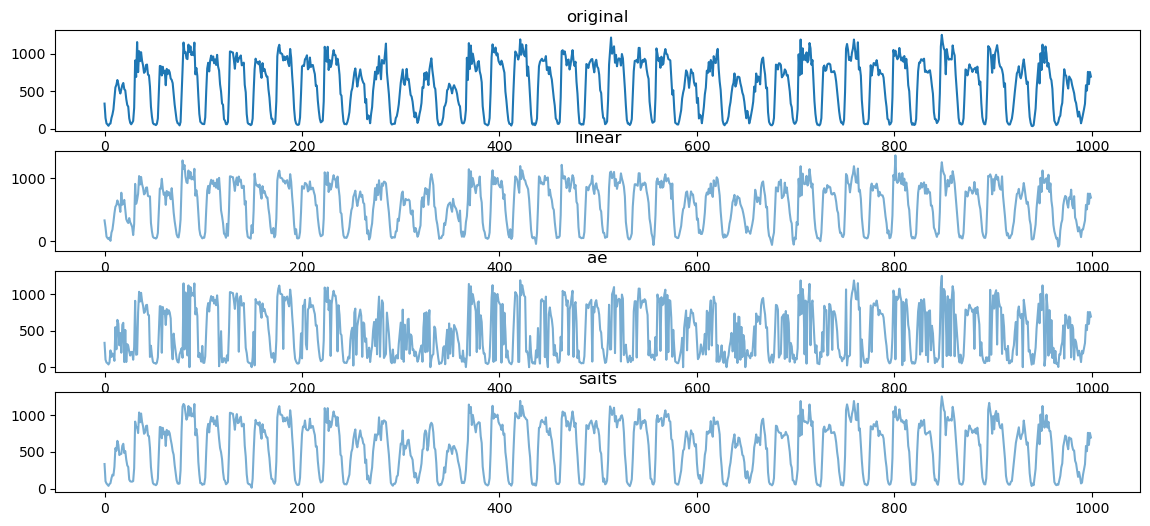

In [204]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=4)
ax[0].plot(madrid[:1000,0])
ax[0].title.set_text('original')
ax[1].plot(test_linear[:1000,0],alpha=0.6)
ax[1].title.set_text('linear')
ax[2].plot(test_ae[:1000,0],alpha=0.6)
ax[2].title.set_text('ae')
ax[3].plot(test_saits[:1000,0],alpha=0.6)
ax[3].title.set_text('saits')

In [ ]:
Вывод: SAITS демонстрирует наилучшие метрики, однако этот метод требует много вычислительных ресурсов

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.